In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
# general hyper parameters
num_epochs = 50
batch_size = 64
learning_rate = 1e-4
image_size = 784    # 28 * 28

In [4]:
# hyper parameters for the discriminator
d_hidden_size = 128
d_ksteps = 1

In [5]:
# hyper parameters for the generator
latent_dim = 128
g_hidden_size = 256

In [8]:
# Get the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))])


mnist_train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)

# TODO test_dataset

mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train_dataset, batch_size=batch_size, shuffle=False)

# TODO test_loader

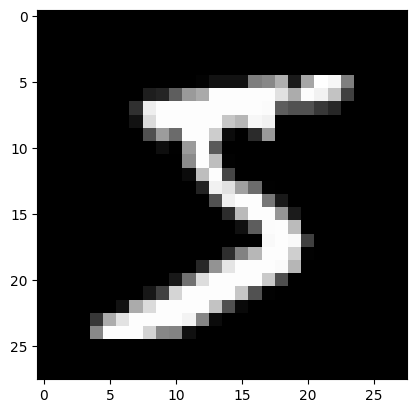

In [9]:
dataiter = iter(mnist_train_loader)
images, labels = next(dataiter)
image = np.array(images[0], dtype="float")
image = image / 2 + 0.5
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap="gray")
plt.show()

In [10]:
# Define the discriminator, returns a value between 0 and 1, a possibility.
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            # nn.LeakyReLU(0.01),
            # nn.Linear(hidden_size, hidden_size),
            # nn.Tanh(),
            # nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.01),
            nn.Linear(hidden_size, 1),
            nn.Dropout(0.2),
            nn.Sigmoid(),
        )
        # self.l1 = nn.Linear(input_size, hidden_size)
        # self.relu = nn.ReLU()
        # self.l2 = nn.Linear(hidden_size, hidden_size)
        # self.l3 = nn.Linear(hidden_size, 1)
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.disc(x)
        # out = self.l1(x)
        # out = self.relu(out)
        # out = self.l2(out)
        # out = self.relu(out)
        # out = self.l3(out)
        # out = self.sigmoid(out)
        return out

In [12]:
# Define the generator, returns a tensor with shape (3, 32, 32)
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_size):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(latent_dim, hidden_size),
            nn.LeakyReLU(0.01),
            nn.Linear(hidden_size, image_size),
            nn.Tanh(),      
        )
        # self.l1 = nn.Linear(latent_dim_size, hidden_size)
        # self.relu = nn.ReLU()
        # self.tanh = nn.Tanh()
        # self.l2 = nn.Linear(hidden_size, int(d_input_size / 2))
        # self.l3 = nn.Linear(int(d_input_size / 2), d_input_size)

    def forward(self, z):
        out = self.gen(z)
        # out = self.l1(z)
        # out = self.tanh(out)
        # out = self.l2(out)
        # out = self.tanh(out)
        # out = self.l3(out)
        # out = self.tanh(out)
        return out
        

In [14]:
# Create the generator, the discriminator, their respective optimizers and loss criterion
generator = Generator(latent_dim, g_hidden_size).to(device)

discriminator = Discriminator(image_size, d_hidden_size).to(device)

genopt = torch.optim.Adam(generator.parameters(), lr=learning_rate)

discopt = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)

criterion = nn.BCELoss()

epoch 1 / 50, step 100 / 938, gen_loss = 0.6802, disc_loss = 0.4747
epoch 1 / 50, step 200 / 938, gen_loss = 0.6860, disc_loss = 0.5358
epoch 1 / 50, step 300 / 938, gen_loss = 0.9066, disc_loss = 0.4704
epoch 1 / 50, step 400 / 938, gen_loss = 0.7678, disc_loss = 0.4847
epoch 1 / 50, step 500 / 938, gen_loss = 0.6849, disc_loss = 0.6024
torch.Size([1, 784])
tensor([[0.5327]], device='cuda:0', grad_fn=<SigmoidBackward0>)


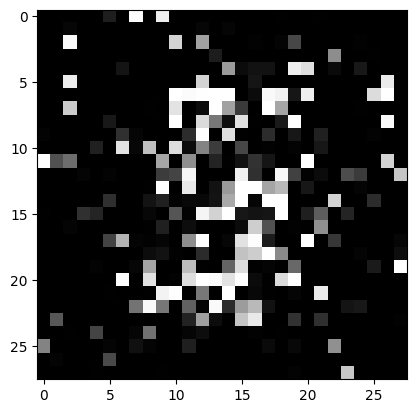

epoch 1 / 50, step 600 / 938, gen_loss = 0.7395, disc_loss = 0.5197
epoch 1 / 50, step 700 / 938, gen_loss = 0.8739, disc_loss = 0.4953
epoch 1 / 50, step 800 / 938, gen_loss = 0.7780, disc_loss = 0.5526
epoch 1 / 50, step 900 / 938, gen_loss = 0.8640, disc_loss = 0.5223
epoch 2 / 50, step 100 / 938, gen_loss = 0.8489, disc_loss = 0.5391
epoch 2 / 50, step 200 / 938, gen_loss = 0.6979, disc_loss = 0.6728
epoch 2 / 50, step 300 / 938, gen_loss = 0.7185, disc_loss = 0.6144
epoch 2 / 50, step 400 / 938, gen_loss = 0.6817, disc_loss = 0.6815
epoch 2 / 50, step 500 / 938, gen_loss = 0.9022, disc_loss = 0.5306
torch.Size([1, 784])
tensor([[0.1933]], device='cuda:0', grad_fn=<SigmoidBackward0>)


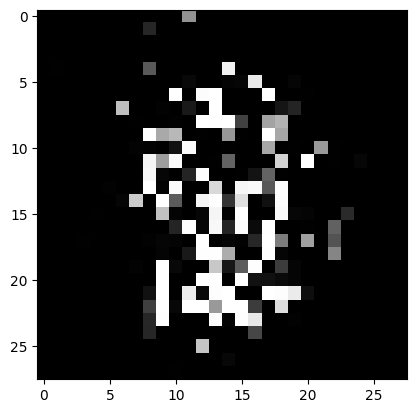

epoch 2 / 50, step 600 / 938, gen_loss = 0.9903, disc_loss = 0.5208
epoch 2 / 50, step 700 / 938, gen_loss = 0.6435, disc_loss = 0.6851
epoch 2 / 50, step 800 / 938, gen_loss = 0.9121, disc_loss = 0.5425
epoch 2 / 50, step 900 / 938, gen_loss = 0.8359, disc_loss = 0.6146
epoch 3 / 50, step 100 / 938, gen_loss = 0.8122, disc_loss = 0.5765
epoch 3 / 50, step 200 / 938, gen_loss = 0.8895, disc_loss = 0.5712
epoch 3 / 50, step 300 / 938, gen_loss = 0.9130, disc_loss = 0.4581
epoch 3 / 50, step 400 / 938, gen_loss = 1.0262, disc_loss = 0.4504
epoch 3 / 50, step 500 / 938, gen_loss = 0.7409, disc_loss = 0.6812
torch.Size([1, 784])
tensor([[0.3613]], device='cuda:0', grad_fn=<SigmoidBackward0>)


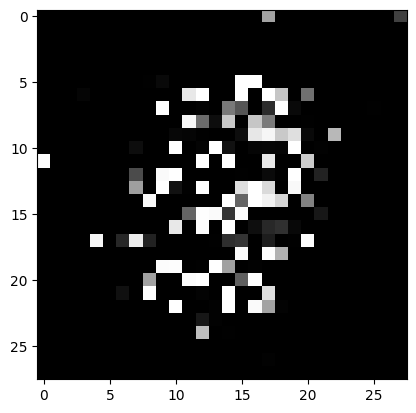

epoch 3 / 50, step 600 / 938, gen_loss = 0.9334, disc_loss = 0.4999
epoch 3 / 50, step 700 / 938, gen_loss = 0.8768, disc_loss = 0.5665
epoch 3 / 50, step 800 / 938, gen_loss = 0.6767, disc_loss = 0.7072
epoch 3 / 50, step 900 / 938, gen_loss = 0.8204, disc_loss = 0.5561
epoch 4 / 50, step 100 / 938, gen_loss = 0.7728, disc_loss = 0.6665
epoch 4 / 50, step 200 / 938, gen_loss = 0.8896, disc_loss = 0.5600
epoch 4 / 50, step 300 / 938, gen_loss = 0.6801, disc_loss = 0.6814
epoch 4 / 50, step 400 / 938, gen_loss = 0.7214, disc_loss = 0.6453
epoch 4 / 50, step 500 / 938, gen_loss = 0.7851, disc_loss = 0.6163
torch.Size([1, 784])
tensor([[0.4903]], device='cuda:0', grad_fn=<SigmoidBackward0>)


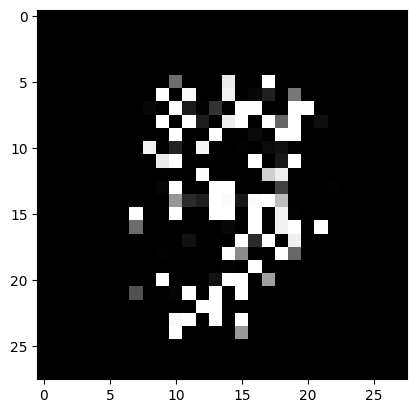

epoch 4 / 50, step 600 / 938, gen_loss = 0.8802, disc_loss = 0.6135
epoch 4 / 50, step 700 / 938, gen_loss = 0.7554, disc_loss = 0.7093
epoch 4 / 50, step 800 / 938, gen_loss = 1.1666, disc_loss = 0.4371
epoch 4 / 50, step 900 / 938, gen_loss = 0.7185, disc_loss = 0.6692
epoch 5 / 50, step 100 / 938, gen_loss = 0.8463, disc_loss = 0.6128
epoch 5 / 50, step 200 / 938, gen_loss = 0.7881, disc_loss = 0.5856
epoch 5 / 50, step 300 / 938, gen_loss = 0.8152, disc_loss = 0.6414
epoch 5 / 50, step 400 / 938, gen_loss = 0.8088, disc_loss = 0.6943
epoch 5 / 50, step 500 / 938, gen_loss = 0.7635, disc_loss = 0.6412
torch.Size([1, 784])
tensor([[0.3839]], device='cuda:0', grad_fn=<SigmoidBackward0>)


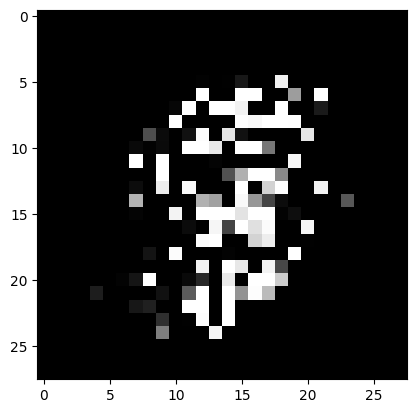

epoch 5 / 50, step 600 / 938, gen_loss = 0.7174, disc_loss = 0.6276
epoch 5 / 50, step 700 / 938, gen_loss = 0.7477, disc_loss = 0.6619
epoch 5 / 50, step 800 / 938, gen_loss = 0.8531, disc_loss = 0.5775
epoch 5 / 50, step 900 / 938, gen_loss = 0.7631, disc_loss = 0.6398
epoch 6 / 50, step 100 / 938, gen_loss = 0.7305, disc_loss = 0.6988
epoch 6 / 50, step 200 / 938, gen_loss = 1.1590, disc_loss = 0.4179
epoch 6 / 50, step 300 / 938, gen_loss = 0.8215, disc_loss = 0.5829
epoch 6 / 50, step 400 / 938, gen_loss = 0.7150, disc_loss = 0.7440
epoch 6 / 50, step 500 / 938, gen_loss = 0.8385, disc_loss = 0.6354
torch.Size([1, 784])
tensor([[0.3122]], device='cuda:0', grad_fn=<SigmoidBackward0>)


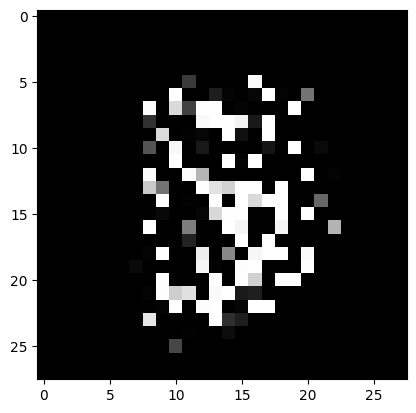

epoch 6 / 50, step 600 / 938, gen_loss = 0.9122, disc_loss = 0.6449
epoch 6 / 50, step 700 / 938, gen_loss = 0.8156, disc_loss = 0.6767
epoch 6 / 50, step 800 / 938, gen_loss = 0.9418, disc_loss = 0.5800
epoch 6 / 50, step 900 / 938, gen_loss = 0.8862, disc_loss = 0.5780
epoch 7 / 50, step 100 / 938, gen_loss = 0.8560, disc_loss = 0.6295
epoch 7 / 50, step 200 / 938, gen_loss = 1.1141, disc_loss = 0.4346
epoch 7 / 50, step 300 / 938, gen_loss = 0.9016, disc_loss = 0.5419
epoch 7 / 50, step 400 / 938, gen_loss = 1.0099, disc_loss = 0.5355
epoch 7 / 50, step 500 / 938, gen_loss = 1.1325, disc_loss = 0.4244
torch.Size([1, 784])
tensor([[0.3026]], device='cuda:0', grad_fn=<SigmoidBackward0>)


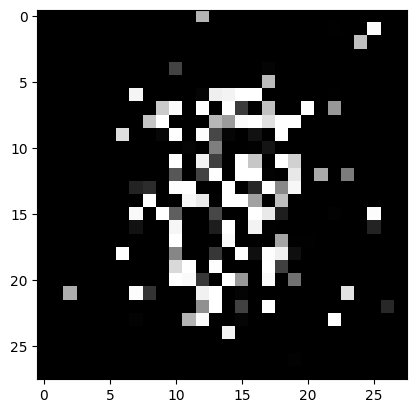

epoch 7 / 50, step 600 / 938, gen_loss = 0.8480, disc_loss = 0.5822
epoch 7 / 50, step 700 / 938, gen_loss = 1.0117, disc_loss = 0.5375
epoch 7 / 50, step 800 / 938, gen_loss = 0.9227, disc_loss = 0.6009
epoch 7 / 50, step 900 / 938, gen_loss = 0.9430, disc_loss = 0.5582
epoch 8 / 50, step 100 / 938, gen_loss = 0.7486, disc_loss = 0.6724
epoch 8 / 50, step 200 / 938, gen_loss = 0.7737, disc_loss = 0.6869
epoch 8 / 50, step 300 / 938, gen_loss = 0.7998, disc_loss = 0.6548
epoch 8 / 50, step 400 / 938, gen_loss = 0.7998, disc_loss = 0.6461
epoch 8 / 50, step 500 / 938, gen_loss = 0.9773, disc_loss = 0.5656
torch.Size([1, 784])
tensor([[0.4110]], device='cuda:0', grad_fn=<SigmoidBackward0>)


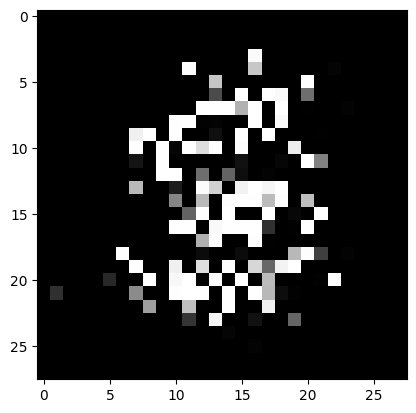

epoch 8 / 50, step 600 / 938, gen_loss = 0.7713, disc_loss = 0.6584
epoch 8 / 50, step 700 / 938, gen_loss = 1.0355, disc_loss = 0.5365
epoch 8 / 50, step 800 / 938, gen_loss = 0.9074, disc_loss = 0.6040
epoch 8 / 50, step 900 / 938, gen_loss = 0.7476, disc_loss = 0.6378
epoch 9 / 50, step 100 / 938, gen_loss = 1.1611, disc_loss = 0.4288
epoch 9 / 50, step 200 / 938, gen_loss = 0.9733, disc_loss = 0.5186
epoch 9 / 50, step 300 / 938, gen_loss = 0.6878, disc_loss = 0.6723
epoch 9 / 50, step 400 / 938, gen_loss = 0.9965, disc_loss = 0.5056
epoch 9 / 50, step 500 / 938, gen_loss = 0.9394, disc_loss = 0.5722
torch.Size([1, 784])
tensor([[0.3005]], device='cuda:0', grad_fn=<SigmoidBackward0>)


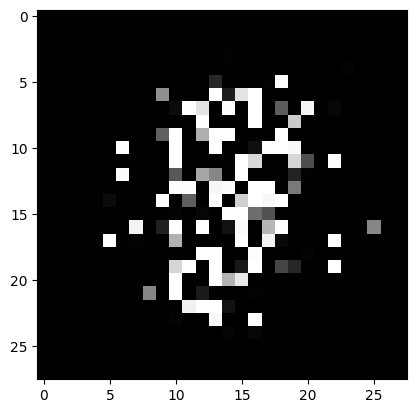

epoch 9 / 50, step 600 / 938, gen_loss = 0.7078, disc_loss = 0.6959
epoch 9 / 50, step 700 / 938, gen_loss = 0.7639, disc_loss = 0.6389
epoch 9 / 50, step 800 / 938, gen_loss = 0.8802, disc_loss = 0.5648
epoch 9 / 50, step 900 / 938, gen_loss = 0.6952, disc_loss = 0.7208
epoch 10 / 50, step 100 / 938, gen_loss = 0.8246, disc_loss = 0.5903
epoch 10 / 50, step 200 / 938, gen_loss = 0.7939, disc_loss = 0.6954
epoch 10 / 50, step 300 / 938, gen_loss = 0.7330, disc_loss = 0.7034
epoch 10 / 50, step 400 / 938, gen_loss = 0.8075, disc_loss = 0.6782
epoch 10 / 50, step 500 / 938, gen_loss = 0.8305, disc_loss = 0.6005
torch.Size([1, 784])
tensor([[0.2661]], device='cuda:0', grad_fn=<SigmoidBackward0>)


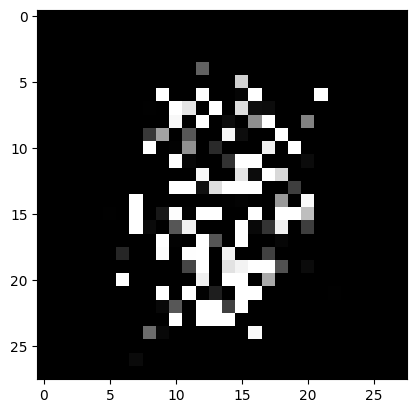

epoch 10 / 50, step 600 / 938, gen_loss = 0.8733, disc_loss = 0.5982
epoch 10 / 50, step 700 / 938, gen_loss = 0.8530, disc_loss = 0.6620
epoch 10 / 50, step 800 / 938, gen_loss = 0.8844, disc_loss = 0.5922
epoch 10 / 50, step 900 / 938, gen_loss = 0.7842, disc_loss = 0.6436
epoch 11 / 50, step 100 / 938, gen_loss = 0.9229, disc_loss = 0.6281
epoch 11 / 50, step 200 / 938, gen_loss = 0.8979, disc_loss = 0.6608
epoch 11 / 50, step 300 / 938, gen_loss = 0.8282, disc_loss = 0.6896
epoch 11 / 50, step 400 / 938, gen_loss = 0.7454, disc_loss = 0.7144
epoch 11 / 50, step 500 / 938, gen_loss = 0.9644, disc_loss = 0.5728
torch.Size([1, 784])
tensor([[0.4070]], device='cuda:0', grad_fn=<SigmoidBackward0>)


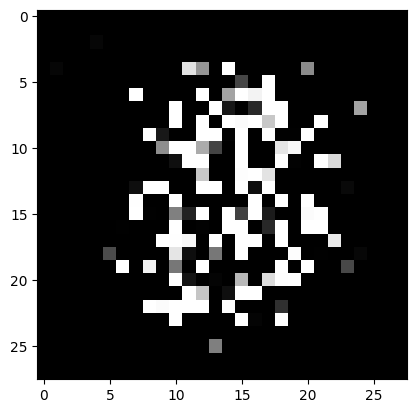

epoch 11 / 50, step 600 / 938, gen_loss = 1.2245, disc_loss = 0.4132
epoch 11 / 50, step 700 / 938, gen_loss = 0.9718, disc_loss = 0.5340
epoch 11 / 50, step 800 / 938, gen_loss = 0.9069, disc_loss = 0.6263
epoch 11 / 50, step 900 / 938, gen_loss = 0.8439, disc_loss = 0.5787
epoch 12 / 50, step 100 / 938, gen_loss = 1.2371, disc_loss = 0.3924
epoch 12 / 50, step 200 / 938, gen_loss = 1.5589, disc_loss = 0.3394
epoch 12 / 50, step 300 / 938, gen_loss = 1.1221, disc_loss = 0.4390
epoch 12 / 50, step 400 / 938, gen_loss = 1.2823, disc_loss = 0.4706
epoch 12 / 50, step 500 / 938, gen_loss = 1.0258, disc_loss = 0.5756
torch.Size([1, 784])
tensor([[0.2059]], device='cuda:0', grad_fn=<SigmoidBackward0>)


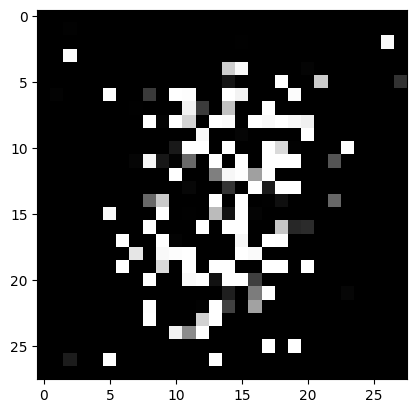

epoch 12 / 50, step 600 / 938, gen_loss = 1.4123, disc_loss = 0.3397
epoch 12 / 50, step 700 / 938, gen_loss = 1.2019, disc_loss = 0.3641
epoch 12 / 50, step 800 / 938, gen_loss = 1.1383, disc_loss = 0.3936
epoch 12 / 50, step 900 / 938, gen_loss = 1.1367, disc_loss = 0.4557
epoch 13 / 50, step 100 / 938, gen_loss = 0.8806, disc_loss = 0.6182
epoch 13 / 50, step 200 / 938, gen_loss = 0.8844, disc_loss = 0.6225
epoch 13 / 50, step 300 / 938, gen_loss = 0.9382, disc_loss = 0.5265
epoch 13 / 50, step 400 / 938, gen_loss = 0.9591, disc_loss = 0.6355
epoch 13 / 50, step 500 / 938, gen_loss = 0.8612, disc_loss = 0.6445
torch.Size([1, 784])
tensor([[0.5339]], device='cuda:0', grad_fn=<SigmoidBackward0>)


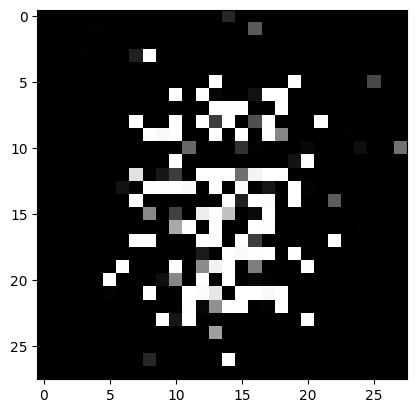

epoch 13 / 50, step 600 / 938, gen_loss = 1.1020, disc_loss = 0.5439
epoch 13 / 50, step 700 / 938, gen_loss = 1.0599, disc_loss = 0.4937
epoch 13 / 50, step 800 / 938, gen_loss = 0.7914, disc_loss = 0.6043
epoch 13 / 50, step 900 / 938, gen_loss = 1.2555, disc_loss = 0.3966
epoch 14 / 50, step 100 / 938, gen_loss = 1.1208, disc_loss = 0.4606
epoch 14 / 50, step 200 / 938, gen_loss = 1.1482, disc_loss = 0.4760
epoch 14 / 50, step 300 / 938, gen_loss = 1.1405, disc_loss = 0.4755
epoch 14 / 50, step 400 / 938, gen_loss = 1.2135, disc_loss = 0.4215
epoch 14 / 50, step 500 / 938, gen_loss = 1.2361, disc_loss = 0.3697
torch.Size([1, 784])
tensor([[0.2084]], device='cuda:0', grad_fn=<SigmoidBackward0>)


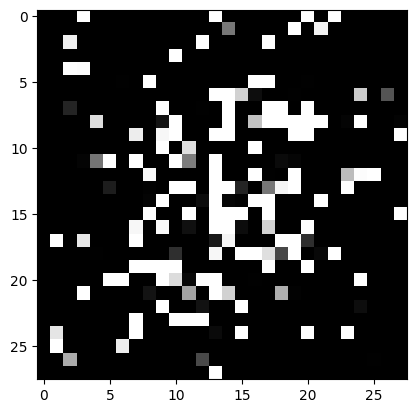

epoch 14 / 50, step 600 / 938, gen_loss = 1.6312, disc_loss = 0.2977
epoch 14 / 50, step 700 / 938, gen_loss = 1.4950, disc_loss = 0.2800
epoch 14 / 50, step 800 / 938, gen_loss = 1.3217, disc_loss = 0.3980
epoch 14 / 50, step 900 / 938, gen_loss = 1.3798, disc_loss = 0.3611
epoch 15 / 50, step 100 / 938, gen_loss = 1.5114, disc_loss = 0.3428
epoch 15 / 50, step 200 / 938, gen_loss = 1.7292, disc_loss = 0.2835
epoch 15 / 50, step 300 / 938, gen_loss = 1.6033, disc_loss = 0.3630
epoch 15 / 50, step 400 / 938, gen_loss = 1.4612, disc_loss = 0.3829
epoch 15 / 50, step 500 / 938, gen_loss = 1.3545, disc_loss = 0.4032
torch.Size([1, 784])
tensor([[0.1938]], device='cuda:0', grad_fn=<SigmoidBackward0>)


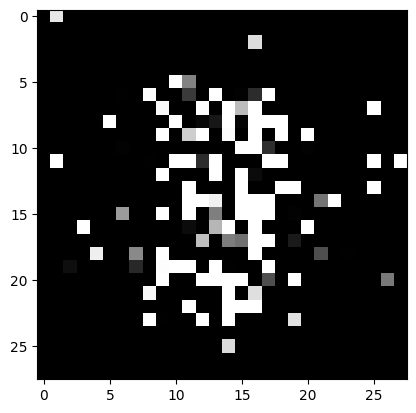

epoch 15 / 50, step 600 / 938, gen_loss = 1.2194, disc_loss = 0.3873
epoch 15 / 50, step 700 / 938, gen_loss = 1.3196, disc_loss = 0.4285
epoch 15 / 50, step 800 / 938, gen_loss = 1.0792, disc_loss = 0.5104
epoch 15 / 50, step 900 / 938, gen_loss = 1.1239, disc_loss = 0.4861
epoch 16 / 50, step 100 / 938, gen_loss = 1.2071, disc_loss = 0.4542
epoch 16 / 50, step 200 / 938, gen_loss = 1.0569, disc_loss = 0.4858
epoch 16 / 50, step 300 / 938, gen_loss = 1.1317, disc_loss = 0.5403
epoch 16 / 50, step 400 / 938, gen_loss = 1.0656, disc_loss = 0.5787
epoch 16 / 50, step 500 / 938, gen_loss = 1.0233, disc_loss = 0.5197
torch.Size([1, 784])
tensor([[0.1918]], device='cuda:0', grad_fn=<SigmoidBackward0>)


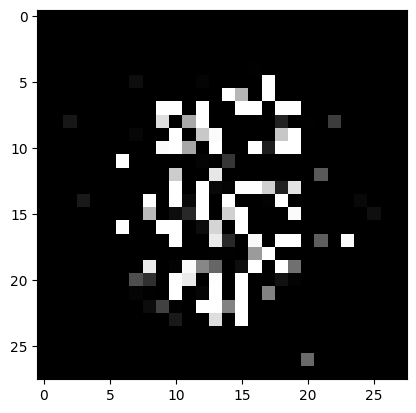

epoch 16 / 50, step 600 / 938, gen_loss = 1.2575, disc_loss = 0.5425
epoch 16 / 50, step 700 / 938, gen_loss = 1.0052, disc_loss = 0.5772
epoch 16 / 50, step 800 / 938, gen_loss = 1.1938, disc_loss = 0.4132
epoch 16 / 50, step 900 / 938, gen_loss = 0.9698, disc_loss = 0.5635
epoch 17 / 50, step 100 / 938, gen_loss = 0.8342, disc_loss = 0.6201
epoch 17 / 50, step 200 / 938, gen_loss = 0.8799, disc_loss = 0.6118
epoch 17 / 50, step 300 / 938, gen_loss = 1.0710, disc_loss = 0.5694
epoch 17 / 50, step 400 / 938, gen_loss = 1.0386, disc_loss = 0.5270
epoch 17 / 50, step 500 / 938, gen_loss = 1.0568, disc_loss = 0.6589
torch.Size([1, 784])
tensor([[0.3368]], device='cuda:0', grad_fn=<SigmoidBackward0>)


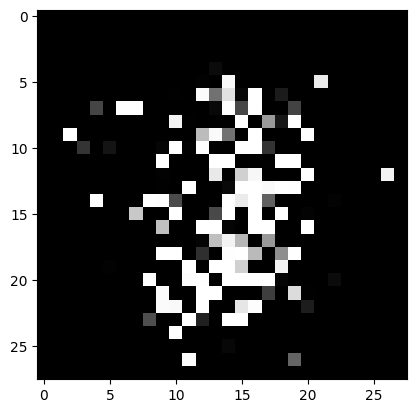

epoch 17 / 50, step 600 / 938, gen_loss = 0.8873, disc_loss = 0.5909
epoch 17 / 50, step 700 / 938, gen_loss = 1.0427, disc_loss = 0.4787
epoch 17 / 50, step 800 / 938, gen_loss = 1.1071, disc_loss = 0.5103
epoch 17 / 50, step 900 / 938, gen_loss = 1.0918, disc_loss = 0.4327
epoch 18 / 50, step 100 / 938, gen_loss = 0.8818, disc_loss = 0.5905
epoch 18 / 50, step 200 / 938, gen_loss = 1.2157, disc_loss = 0.6064
epoch 18 / 50, step 300 / 938, gen_loss = 1.1879, disc_loss = 0.5176
epoch 18 / 50, step 400 / 938, gen_loss = 1.1348, disc_loss = 0.5560
epoch 18 / 50, step 500 / 938, gen_loss = 1.2877, disc_loss = 0.4366
torch.Size([1, 784])
tensor([[0.1711]], device='cuda:0', grad_fn=<SigmoidBackward0>)


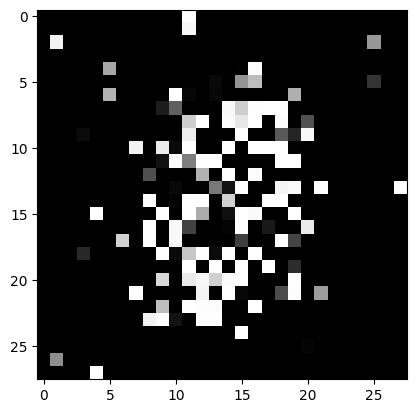

epoch 18 / 50, step 600 / 938, gen_loss = 1.3424, disc_loss = 0.3857
epoch 18 / 50, step 700 / 938, gen_loss = 1.4015, disc_loss = 0.4439
epoch 18 / 50, step 800 / 938, gen_loss = 1.1568, disc_loss = 0.4629
epoch 18 / 50, step 900 / 938, gen_loss = 0.8243, disc_loss = 0.5758
epoch 19 / 50, step 100 / 938, gen_loss = 1.2161, disc_loss = 0.4583
epoch 19 / 50, step 200 / 938, gen_loss = 1.0269, disc_loss = 0.4587
epoch 19 / 50, step 300 / 938, gen_loss = 1.4731, disc_loss = 0.4241
epoch 19 / 50, step 400 / 938, gen_loss = 1.2898, disc_loss = 0.5265
epoch 19 / 50, step 500 / 938, gen_loss = 1.1378, disc_loss = 0.4935
torch.Size([1, 784])
tensor([[0.1036]], device='cuda:0', grad_fn=<SigmoidBackward0>)


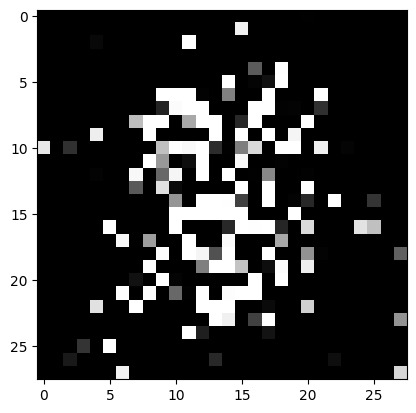

epoch 19 / 50, step 600 / 938, gen_loss = 1.3566, disc_loss = 0.4480
epoch 19 / 50, step 700 / 938, gen_loss = 1.4649, disc_loss = 0.4110
epoch 19 / 50, step 800 / 938, gen_loss = 1.4379, disc_loss = 0.4230
epoch 19 / 50, step 900 / 938, gen_loss = 1.5549, disc_loss = 0.3644
epoch 20 / 50, step 100 / 938, gen_loss = 1.6091, disc_loss = 0.3422
epoch 20 / 50, step 200 / 938, gen_loss = 1.1990, disc_loss = 0.4173
epoch 20 / 50, step 300 / 938, gen_loss = 1.3856, disc_loss = 0.3710
epoch 20 / 50, step 400 / 938, gen_loss = 1.4113, disc_loss = 0.4433
epoch 20 / 50, step 500 / 938, gen_loss = 1.3414, disc_loss = 0.4770
torch.Size([1, 784])
tensor([[0.1405]], device='cuda:0', grad_fn=<SigmoidBackward0>)


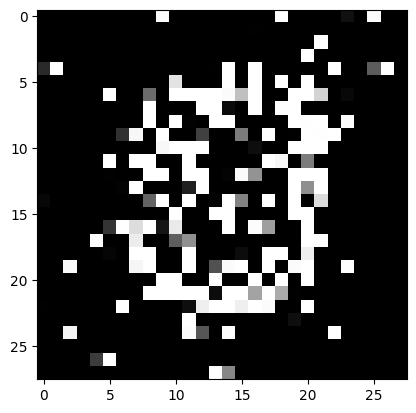

epoch 20 / 50, step 600 / 938, gen_loss = 1.3052, disc_loss = 0.4020
epoch 20 / 50, step 700 / 938, gen_loss = 1.3438, disc_loss = 0.4101
epoch 20 / 50, step 800 / 938, gen_loss = 1.2852, disc_loss = 0.4066
epoch 20 / 50, step 900 / 938, gen_loss = 1.3375, disc_loss = 0.4226
epoch 21 / 50, step 100 / 938, gen_loss = 1.6853, disc_loss = 0.3504
epoch 21 / 50, step 200 / 938, gen_loss = 1.4030, disc_loss = 0.3715
epoch 21 / 50, step 300 / 938, gen_loss = 1.4900, disc_loss = 0.3828
epoch 21 / 50, step 400 / 938, gen_loss = 1.7106, disc_loss = 0.3184
epoch 21 / 50, step 500 / 938, gen_loss = 1.8351, disc_loss = 0.2757
torch.Size([1, 784])
tensor([[0.2228]], device='cuda:0', grad_fn=<SigmoidBackward0>)


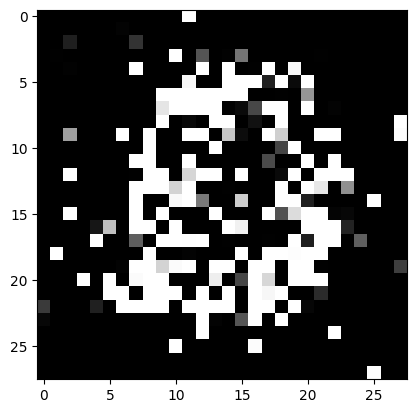

epoch 21 / 50, step 600 / 938, gen_loss = 1.4629, disc_loss = 0.4293
epoch 21 / 50, step 700 / 938, gen_loss = 1.3028, disc_loss = 0.4518
epoch 21 / 50, step 800 / 938, gen_loss = 1.4189, disc_loss = 0.3595
epoch 21 / 50, step 900 / 938, gen_loss = 1.4325, disc_loss = 0.3619
epoch 22 / 50, step 100 / 938, gen_loss = 1.4912, disc_loss = 0.4026
epoch 22 / 50, step 200 / 938, gen_loss = 1.6297, disc_loss = 0.3648
epoch 22 / 50, step 300 / 938, gen_loss = 1.4835, disc_loss = 0.3522
epoch 22 / 50, step 400 / 938, gen_loss = 1.2267, disc_loss = 0.3968
epoch 22 / 50, step 500 / 938, gen_loss = 1.3584, disc_loss = 0.4499
torch.Size([1, 784])
tensor([[0.1819]], device='cuda:0', grad_fn=<SigmoidBackward0>)


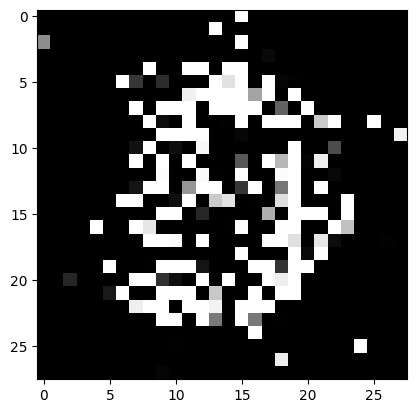

epoch 22 / 50, step 600 / 938, gen_loss = 1.3302, disc_loss = 0.4347
epoch 22 / 50, step 700 / 938, gen_loss = 1.5428, disc_loss = 0.4042
epoch 22 / 50, step 800 / 938, gen_loss = 1.3561, disc_loss = 0.4401
epoch 22 / 50, step 900 / 938, gen_loss = 1.1745, disc_loss = 0.4696
epoch 23 / 50, step 100 / 938, gen_loss = 1.2357, disc_loss = 0.5222
epoch 23 / 50, step 200 / 938, gen_loss = 1.1574, disc_loss = 0.4927
epoch 23 / 50, step 300 / 938, gen_loss = 1.1412, disc_loss = 0.5569
epoch 23 / 50, step 400 / 938, gen_loss = 1.4326, disc_loss = 0.4745
epoch 23 / 50, step 500 / 938, gen_loss = 1.1522, disc_loss = 0.4477
torch.Size([1, 784])
tensor([[0.7484]], device='cuda:0', grad_fn=<SigmoidBackward0>)


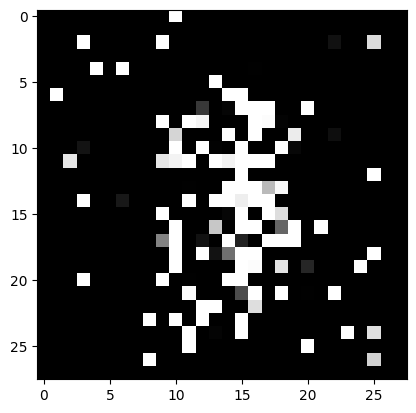

epoch 23 / 50, step 600 / 938, gen_loss = 1.4723, disc_loss = 0.4673
epoch 23 / 50, step 700 / 938, gen_loss = 1.4644, disc_loss = 0.4409
epoch 23 / 50, step 800 / 938, gen_loss = 1.1370, disc_loss = 0.5573
epoch 23 / 50, step 900 / 938, gen_loss = 1.4551, disc_loss = 0.4232
epoch 24 / 50, step 100 / 938, gen_loss = 1.6731, disc_loss = 0.3718
epoch 24 / 50, step 200 / 938, gen_loss = 1.6402, disc_loss = 0.3927
epoch 24 / 50, step 300 / 938, gen_loss = 1.4739, disc_loss = 0.3260
epoch 24 / 50, step 400 / 938, gen_loss = 1.7619, disc_loss = 0.3605
epoch 24 / 50, step 500 / 938, gen_loss = 1.7488, disc_loss = 0.3265
torch.Size([1, 784])
tensor([[0.0429]], device='cuda:0', grad_fn=<SigmoidBackward0>)


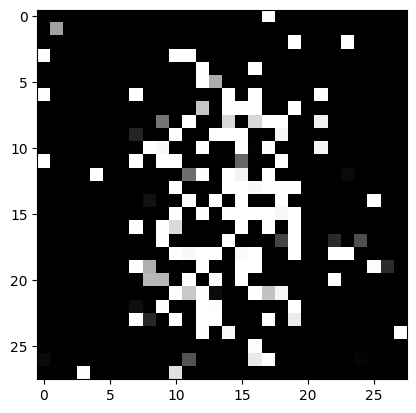

epoch 24 / 50, step 600 / 938, gen_loss = 2.0701, disc_loss = 0.2554
epoch 24 / 50, step 700 / 938, gen_loss = 1.9052, disc_loss = 0.2810
epoch 24 / 50, step 800 / 938, gen_loss = 1.6262, disc_loss = 0.3782
epoch 24 / 50, step 900 / 938, gen_loss = 1.4606, disc_loss = 0.3469
epoch 25 / 50, step 100 / 938, gen_loss = 1.5135, disc_loss = 0.3638
epoch 25 / 50, step 200 / 938, gen_loss = 1.6054, disc_loss = 0.3644
epoch 25 / 50, step 300 / 938, gen_loss = 1.5824, disc_loss = 0.3584
epoch 25 / 50, step 400 / 938, gen_loss = 1.6380, disc_loss = 0.3732
epoch 25 / 50, step 500 / 938, gen_loss = 1.4045, disc_loss = 0.4022
torch.Size([1, 784])
tensor([[0.1191]], device='cuda:0', grad_fn=<SigmoidBackward0>)


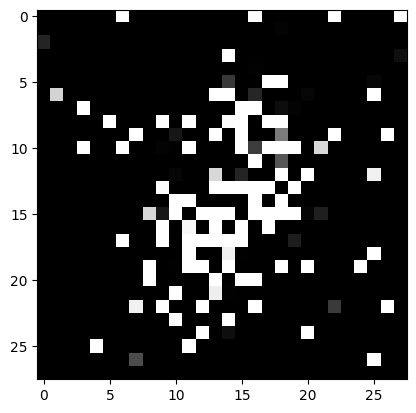

epoch 25 / 50, step 600 / 938, gen_loss = 1.7099, disc_loss = 0.3638
epoch 25 / 50, step 700 / 938, gen_loss = 1.5595, disc_loss = 0.4035
epoch 25 / 50, step 800 / 938, gen_loss = 2.0901, disc_loss = 0.3175
epoch 25 / 50, step 900 / 938, gen_loss = 1.7981, disc_loss = 0.3145
epoch 26 / 50, step 100 / 938, gen_loss = 1.9092, disc_loss = 0.3213
epoch 26 / 50, step 200 / 938, gen_loss = 2.0429, disc_loss = 0.2486
epoch 26 / 50, step 300 / 938, gen_loss = 1.8536, disc_loss = 0.3473
epoch 26 / 50, step 400 / 938, gen_loss = 1.7562, disc_loss = 0.3176
epoch 26 / 50, step 500 / 938, gen_loss = 2.3157, disc_loss = 0.3168
torch.Size([1, 784])
tensor([[0.0219]], device='cuda:0', grad_fn=<SigmoidBackward0>)


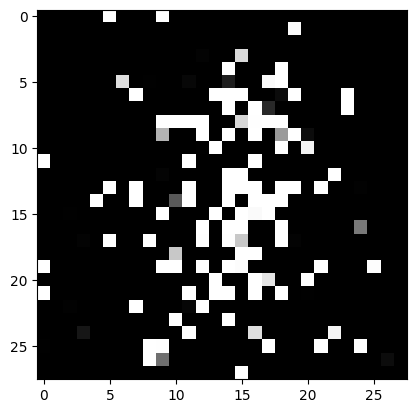

epoch 26 / 50, step 600 / 938, gen_loss = 1.8262, disc_loss = 0.3551
epoch 26 / 50, step 700 / 938, gen_loss = 1.5342, disc_loss = 0.3485
epoch 26 / 50, step 800 / 938, gen_loss = 1.2235, disc_loss = 0.4423
epoch 26 / 50, step 900 / 938, gen_loss = 1.6713, disc_loss = 0.3963
epoch 27 / 50, step 100 / 938, gen_loss = 1.5077, disc_loss = 0.3843
epoch 27 / 50, step 200 / 938, gen_loss = 1.6566, disc_loss = 0.4181
epoch 27 / 50, step 300 / 938, gen_loss = 1.4177, disc_loss = 0.4147
epoch 27 / 50, step 400 / 938, gen_loss = 1.7693, disc_loss = 0.3214
epoch 27 / 50, step 500 / 938, gen_loss = 1.4247, disc_loss = 0.5196
torch.Size([1, 784])
tensor([[0.1871]], device='cuda:0', grad_fn=<SigmoidBackward0>)


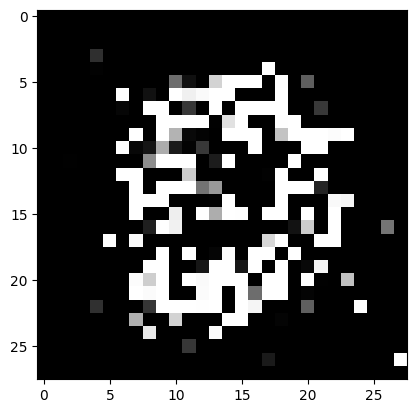

epoch 27 / 50, step 600 / 938, gen_loss = 1.5061, disc_loss = 0.4037
epoch 27 / 50, step 700 / 938, gen_loss = 1.2600, disc_loss = 0.4792
epoch 27 / 50, step 800 / 938, gen_loss = 1.2947, disc_loss = 0.6244
epoch 27 / 50, step 900 / 938, gen_loss = 1.0655, disc_loss = 0.5724
epoch 28 / 50, step 100 / 938, gen_loss = 1.4034, disc_loss = 0.4352
epoch 28 / 50, step 200 / 938, gen_loss = 1.3984, disc_loss = 0.6303
epoch 28 / 50, step 300 / 938, gen_loss = 1.5456, disc_loss = 0.4111
epoch 28 / 50, step 400 / 938, gen_loss = 1.3700, disc_loss = 0.3372
epoch 28 / 50, step 500 / 938, gen_loss = 1.7750, disc_loss = 0.4787
torch.Size([1, 784])
tensor([[0.1441]], device='cuda:0', grad_fn=<SigmoidBackward0>)


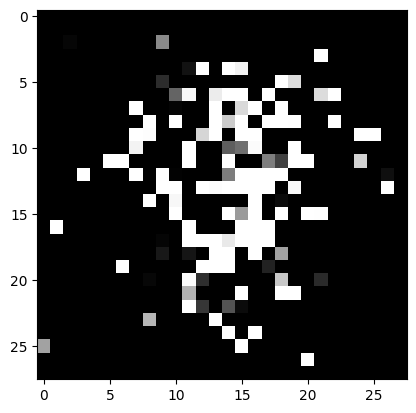

epoch 28 / 50, step 600 / 938, gen_loss = 1.4444, disc_loss = 0.3772
epoch 28 / 50, step 700 / 938, gen_loss = 1.3649, disc_loss = 0.5300
epoch 28 / 50, step 800 / 938, gen_loss = 1.3928, disc_loss = 0.4316
epoch 28 / 50, step 900 / 938, gen_loss = 1.4430, disc_loss = 0.4950
epoch 29 / 50, step 100 / 938, gen_loss = 1.5212, disc_loss = 0.3840
epoch 29 / 50, step 200 / 938, gen_loss = 1.5867, disc_loss = 0.3600
epoch 29 / 50, step 300 / 938, gen_loss = 1.5979, disc_loss = 0.3457
epoch 29 / 50, step 400 / 938, gen_loss = 1.7001, disc_loss = 0.3426
epoch 29 / 50, step 500 / 938, gen_loss = 1.6684, disc_loss = 0.3328
torch.Size([1, 784])
tensor([[0.3165]], device='cuda:0', grad_fn=<SigmoidBackward0>)


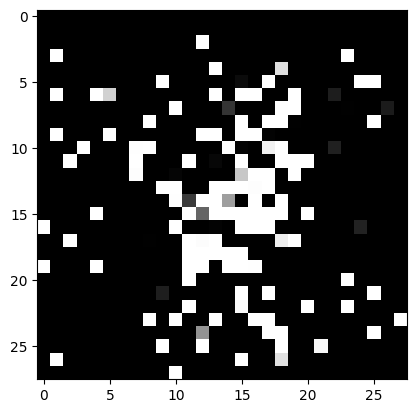

epoch 29 / 50, step 600 / 938, gen_loss = 1.9707, disc_loss = 0.2834
epoch 29 / 50, step 700 / 938, gen_loss = 2.0438, disc_loss = 0.2959
epoch 29 / 50, step 800 / 938, gen_loss = 2.1304, disc_loss = 0.3492
epoch 29 / 50, step 900 / 938, gen_loss = 1.7830, disc_loss = 0.3177
epoch 30 / 50, step 100 / 938, gen_loss = 1.9389, disc_loss = 0.3235
epoch 30 / 50, step 200 / 938, gen_loss = 1.8208, disc_loss = 0.4348
epoch 30 / 50, step 300 / 938, gen_loss = 1.5616, disc_loss = 0.3521
epoch 30 / 50, step 400 / 938, gen_loss = 1.3383, disc_loss = 0.3317
epoch 30 / 50, step 500 / 938, gen_loss = 1.7727, disc_loss = 0.3421
torch.Size([1, 784])
tensor([[0.0475]], device='cuda:0', grad_fn=<SigmoidBackward0>)


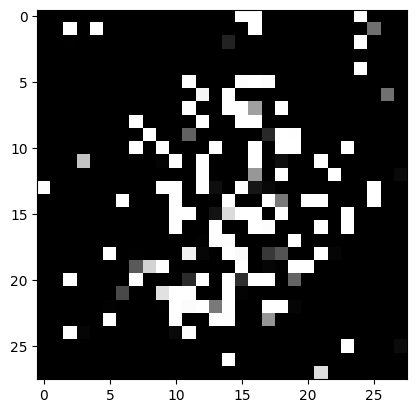

epoch 30 / 50, step 600 / 938, gen_loss = 1.8507, disc_loss = 0.4111
epoch 30 / 50, step 700 / 938, gen_loss = 1.4480, disc_loss = 0.4150
epoch 30 / 50, step 800 / 938, gen_loss = 1.8367, disc_loss = 0.2838
epoch 30 / 50, step 900 / 938, gen_loss = 1.6889, disc_loss = 0.3052
epoch 31 / 50, step 100 / 938, gen_loss = 1.4559, disc_loss = 0.3282
epoch 31 / 50, step 200 / 938, gen_loss = 1.8521, disc_loss = 0.3020
epoch 31 / 50, step 300 / 938, gen_loss = 1.5007, disc_loss = 0.3284
epoch 31 / 50, step 400 / 938, gen_loss = 1.9121, disc_loss = 0.3653
epoch 31 / 50, step 500 / 938, gen_loss = 1.9759, disc_loss = 0.2874
torch.Size([1, 784])
tensor([[0.0774]], device='cuda:0', grad_fn=<SigmoidBackward0>)


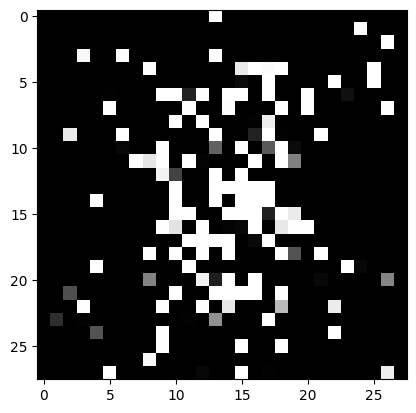

epoch 31 / 50, step 600 / 938, gen_loss = 1.9595, disc_loss = 0.3260
epoch 31 / 50, step 700 / 938, gen_loss = 1.5836, disc_loss = 0.4318
epoch 31 / 50, step 800 / 938, gen_loss = 1.7942, disc_loss = 0.3281
epoch 31 / 50, step 900 / 938, gen_loss = 1.6764, disc_loss = 0.4212
epoch 32 / 50, step 100 / 938, gen_loss = 1.7625, disc_loss = 0.3595
epoch 32 / 50, step 200 / 938, gen_loss = 1.7321, disc_loss = 0.2974
epoch 32 / 50, step 300 / 938, gen_loss = 2.0103, disc_loss = 0.3255
epoch 32 / 50, step 400 / 938, gen_loss = 2.1369, disc_loss = 0.2326
epoch 32 / 50, step 500 / 938, gen_loss = 2.3936, disc_loss = 0.3156
torch.Size([1, 784])
tensor([[0.0777]], device='cuda:0', grad_fn=<SigmoidBackward0>)


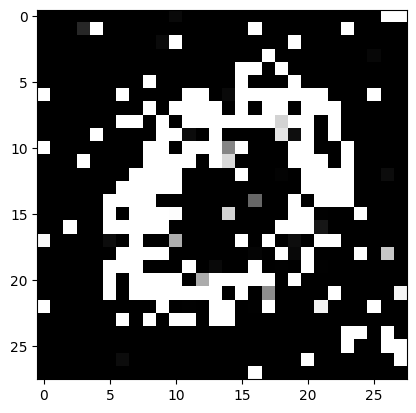

epoch 32 / 50, step 600 / 938, gen_loss = 2.2788, disc_loss = 0.2815
epoch 32 / 50, step 700 / 938, gen_loss = 2.1691, disc_loss = 0.2253
epoch 32 / 50, step 800 / 938, gen_loss = 2.5755, disc_loss = 0.2482
epoch 32 / 50, step 900 / 938, gen_loss = 1.9781, disc_loss = 0.2948
epoch 33 / 50, step 100 / 938, gen_loss = 2.3739, disc_loss = 0.2499
epoch 33 / 50, step 200 / 938, gen_loss = 2.0120, disc_loss = 0.2709
epoch 33 / 50, step 300 / 938, gen_loss = 1.9997, disc_loss = 0.2797
epoch 33 / 50, step 400 / 938, gen_loss = 2.1154, disc_loss = 0.2446
epoch 33 / 50, step 500 / 938, gen_loss = 2.3589, disc_loss = 0.2528
torch.Size([1, 784])
tensor([[0.0027]], device='cuda:0', grad_fn=<SigmoidBackward0>)


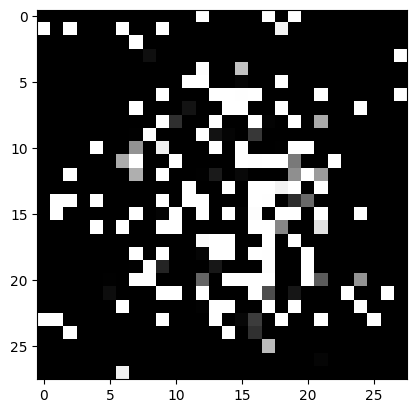

epoch 33 / 50, step 600 / 938, gen_loss = 2.1519, disc_loss = 0.2801
epoch 33 / 50, step 700 / 938, gen_loss = 2.1724, disc_loss = 0.2838
epoch 33 / 50, step 800 / 938, gen_loss = 1.8695, disc_loss = 0.2413
epoch 33 / 50, step 900 / 938, gen_loss = 2.0821, disc_loss = 0.3056
epoch 34 / 50, step 100 / 938, gen_loss = 1.9891, disc_loss = 0.2769
epoch 34 / 50, step 200 / 938, gen_loss = 1.8320, disc_loss = 0.2791
epoch 34 / 50, step 300 / 938, gen_loss = 1.9820, disc_loss = 0.2421
epoch 34 / 50, step 400 / 938, gen_loss = 1.7690, disc_loss = 0.3500
epoch 34 / 50, step 500 / 938, gen_loss = 1.9921, disc_loss = 0.2572
torch.Size([1, 784])
tensor([[0.1131]], device='cuda:0', grad_fn=<SigmoidBackward0>)


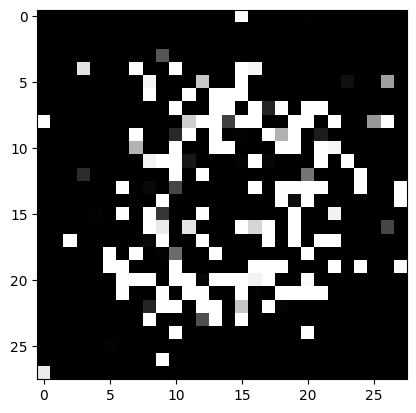

epoch 34 / 50, step 600 / 938, gen_loss = 1.7221, disc_loss = 0.3309
epoch 34 / 50, step 700 / 938, gen_loss = 1.9701, disc_loss = 0.3105
epoch 34 / 50, step 800 / 938, gen_loss = 2.1997, disc_loss = 0.2608
epoch 34 / 50, step 900 / 938, gen_loss = 1.7433, disc_loss = 0.3215
epoch 35 / 50, step 100 / 938, gen_loss = 1.6153, disc_loss = 0.4392
epoch 35 / 50, step 200 / 938, gen_loss = 1.6634, disc_loss = 0.3284
epoch 35 / 50, step 300 / 938, gen_loss = 1.6282, disc_loss = 0.3315
epoch 35 / 50, step 400 / 938, gen_loss = 1.8365, disc_loss = 0.2859
epoch 35 / 50, step 500 / 938, gen_loss = 1.9942, disc_loss = 0.3002
torch.Size([1, 784])
tensor([[0.6785]], device='cuda:0', grad_fn=<SigmoidBackward0>)


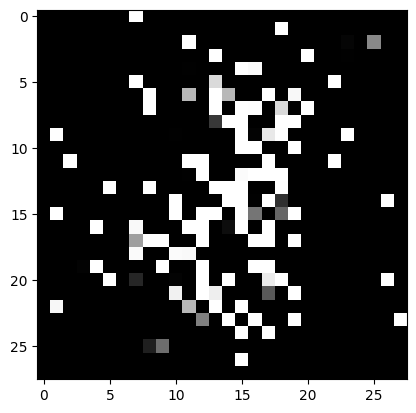

epoch 35 / 50, step 600 / 938, gen_loss = 1.8766, disc_loss = 0.3905
epoch 35 / 50, step 700 / 938, gen_loss = 1.7833, disc_loss = 0.3811
epoch 35 / 50, step 800 / 938, gen_loss = 1.5837, disc_loss = 0.4574
epoch 35 / 50, step 900 / 938, gen_loss = 1.3358, disc_loss = 0.4106
epoch 36 / 50, step 100 / 938, gen_loss = 1.6415, disc_loss = 0.3181
epoch 36 / 50, step 200 / 938, gen_loss = 1.9817, disc_loss = 0.3783
epoch 36 / 50, step 300 / 938, gen_loss = 1.6980, disc_loss = 0.3063
epoch 36 / 50, step 400 / 938, gen_loss = 1.9862, disc_loss = 0.2951
epoch 36 / 50, step 500 / 938, gen_loss = 1.7346, disc_loss = 0.2761
torch.Size([1, 784])
tensor([[0.0158]], device='cuda:0', grad_fn=<SigmoidBackward0>)


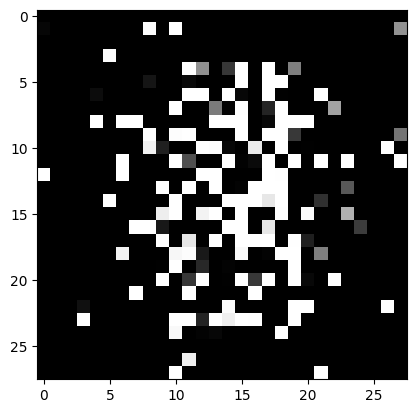

epoch 36 / 50, step 600 / 938, gen_loss = 1.4876, disc_loss = 0.3880
epoch 36 / 50, step 700 / 938, gen_loss = 2.0706, disc_loss = 0.3089
epoch 36 / 50, step 800 / 938, gen_loss = 1.7727, disc_loss = 0.4020
epoch 36 / 50, step 900 / 938, gen_loss = 1.6482, disc_loss = 0.3375
epoch 37 / 50, step 100 / 938, gen_loss = 1.9512, disc_loss = 0.3715
epoch 37 / 50, step 200 / 938, gen_loss = 1.6866, disc_loss = 0.5024
epoch 37 / 50, step 300 / 938, gen_loss = 1.8666, disc_loss = 0.2935
epoch 37 / 50, step 400 / 938, gen_loss = 1.8806, disc_loss = 0.3438
epoch 37 / 50, step 500 / 938, gen_loss = 2.2628, disc_loss = 0.3424
torch.Size([1, 784])
tensor([[0.3910]], device='cuda:0', grad_fn=<SigmoidBackward0>)


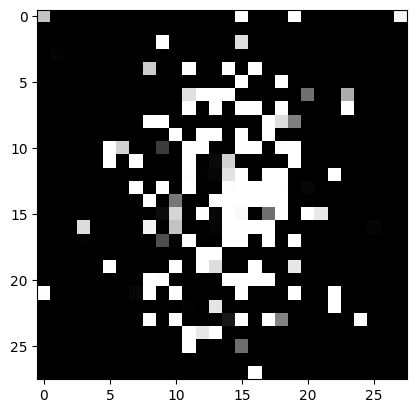

epoch 37 / 50, step 600 / 938, gen_loss = 2.3314, disc_loss = 0.2929
epoch 37 / 50, step 700 / 938, gen_loss = 2.4811, disc_loss = 0.2707
epoch 37 / 50, step 800 / 938, gen_loss = 2.1630, disc_loss = 0.3482
epoch 37 / 50, step 900 / 938, gen_loss = 2.1579, disc_loss = 0.3315
epoch 38 / 50, step 100 / 938, gen_loss = 1.8275, disc_loss = 0.2752
epoch 38 / 50, step 200 / 938, gen_loss = 1.6982, disc_loss = 0.3059
epoch 38 / 50, step 300 / 938, gen_loss = 2.0256, disc_loss = 0.3291
epoch 38 / 50, step 400 / 938, gen_loss = 1.9162, disc_loss = 0.2787
epoch 38 / 50, step 500 / 938, gen_loss = 1.9159, disc_loss = 0.3652
torch.Size([1, 784])
tensor([[0.1503]], device='cuda:0', grad_fn=<SigmoidBackward0>)


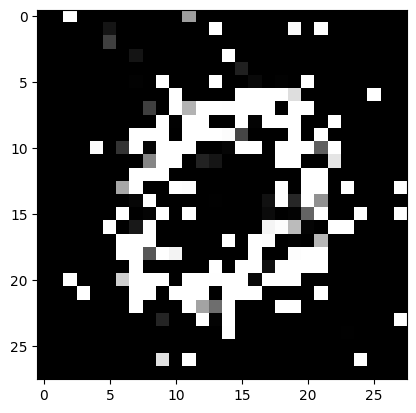

epoch 38 / 50, step 600 / 938, gen_loss = 2.2105, disc_loss = 0.2066
epoch 38 / 50, step 700 / 938, gen_loss = 2.2912, disc_loss = 0.3357
epoch 38 / 50, step 800 / 938, gen_loss = 2.0556, disc_loss = 0.3084
epoch 38 / 50, step 900 / 938, gen_loss = 1.7427, disc_loss = 0.3199
epoch 39 / 50, step 100 / 938, gen_loss = 2.1694, disc_loss = 0.2859
epoch 39 / 50, step 200 / 938, gen_loss = 1.8823, disc_loss = 0.3618
epoch 39 / 50, step 300 / 938, gen_loss = 1.9706, disc_loss = 0.3799
epoch 39 / 50, step 400 / 938, gen_loss = 1.4585, disc_loss = 0.3878
epoch 39 / 50, step 500 / 938, gen_loss = 1.9304, disc_loss = 0.2653
torch.Size([1, 784])
tensor([[0.0322]], device='cuda:0', grad_fn=<SigmoidBackward0>)


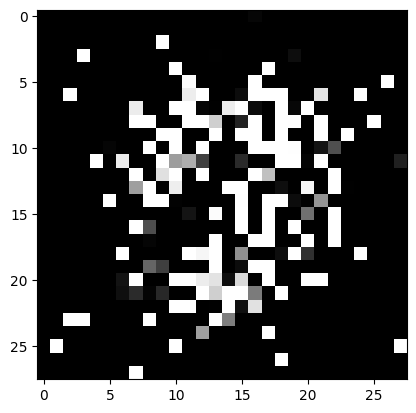

epoch 39 / 50, step 600 / 938, gen_loss = 2.3067, disc_loss = 0.2920
epoch 39 / 50, step 700 / 938, gen_loss = 2.1038, disc_loss = 0.2674
epoch 39 / 50, step 800 / 938, gen_loss = 2.0932, disc_loss = 0.2847
epoch 39 / 50, step 900 / 938, gen_loss = 1.7890, disc_loss = 0.2899
epoch 40 / 50, step 100 / 938, gen_loss = 2.1959, disc_loss = 0.3020
epoch 40 / 50, step 200 / 938, gen_loss = 1.8176, disc_loss = 0.3800
epoch 40 / 50, step 300 / 938, gen_loss = 2.5639, disc_loss = 0.3384
epoch 40 / 50, step 400 / 938, gen_loss = 2.0925, disc_loss = 0.3259
epoch 40 / 50, step 500 / 938, gen_loss = 2.0902, disc_loss = 0.3090
torch.Size([1, 784])
tensor([[0.1193]], device='cuda:0', grad_fn=<SigmoidBackward0>)


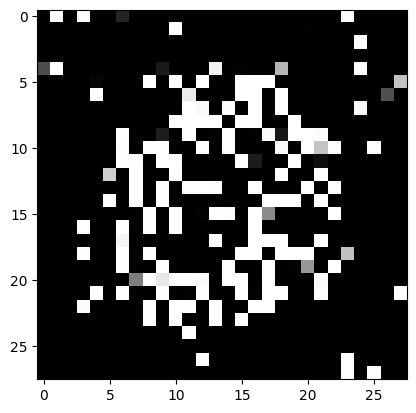

epoch 40 / 50, step 600 / 938, gen_loss = 2.2280, disc_loss = 0.3100
epoch 40 / 50, step 700 / 938, gen_loss = 1.9240, disc_loss = 0.2759
epoch 40 / 50, step 800 / 938, gen_loss = 2.2125, disc_loss = 0.3249
epoch 40 / 50, step 900 / 938, gen_loss = 1.7470, disc_loss = 0.3554
epoch 41 / 50, step 100 / 938, gen_loss = 2.1555, disc_loss = 0.2912
epoch 41 / 50, step 200 / 938, gen_loss = 1.9856, disc_loss = 0.3773
epoch 41 / 50, step 300 / 938, gen_loss = 2.2917, disc_loss = 0.2954
epoch 41 / 50, step 400 / 938, gen_loss = 2.5019, disc_loss = 0.3347
epoch 41 / 50, step 500 / 938, gen_loss = 2.2406, disc_loss = 0.3536
torch.Size([1, 784])
tensor([[0.0085]], device='cuda:0', grad_fn=<SigmoidBackward0>)


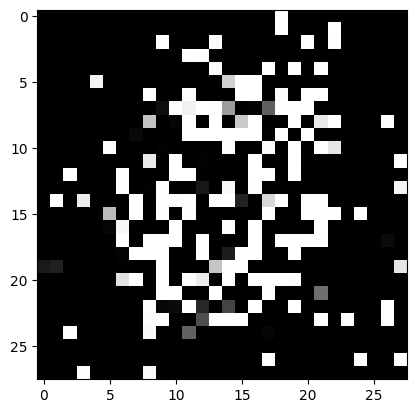

epoch 41 / 50, step 600 / 938, gen_loss = 2.2551, disc_loss = 0.2234
epoch 41 / 50, step 700 / 938, gen_loss = 2.2756, disc_loss = 0.2831
epoch 41 / 50, step 800 / 938, gen_loss = 2.3700, disc_loss = 0.3812
epoch 41 / 50, step 900 / 938, gen_loss = 2.7361, disc_loss = 0.3156
epoch 42 / 50, step 100 / 938, gen_loss = 2.3368, disc_loss = 0.3092
epoch 42 / 50, step 200 / 938, gen_loss = 2.3125, disc_loss = 0.3703
epoch 42 / 50, step 300 / 938, gen_loss = 2.2596, disc_loss = 0.2751
epoch 42 / 50, step 400 / 938, gen_loss = 2.2013, disc_loss = 0.3185
epoch 42 / 50, step 500 / 938, gen_loss = 2.0732, disc_loss = 0.3805
torch.Size([1, 784])
tensor([[0.0145]], device='cuda:0', grad_fn=<SigmoidBackward0>)


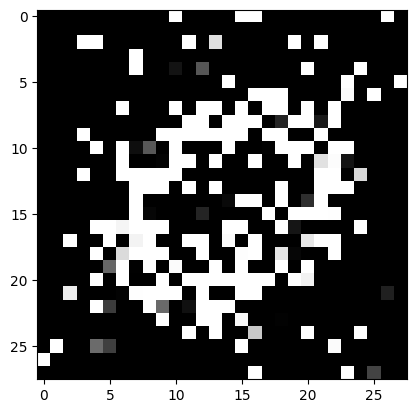

epoch 42 / 50, step 600 / 938, gen_loss = 2.3151, disc_loss = 0.2967
epoch 42 / 50, step 700 / 938, gen_loss = 1.8169, disc_loss = 0.3501
epoch 42 / 50, step 800 / 938, gen_loss = 2.3944, disc_loss = 0.2665
epoch 42 / 50, step 900 / 938, gen_loss = 2.1777, disc_loss = 0.3773
epoch 43 / 50, step 100 / 938, gen_loss = 2.3251, disc_loss = 0.2391
epoch 43 / 50, step 200 / 938, gen_loss = 2.2581, disc_loss = 0.2925
epoch 43 / 50, step 300 / 938, gen_loss = 2.1953, disc_loss = 0.2849
epoch 43 / 50, step 400 / 938, gen_loss = 2.1367, disc_loss = 0.2358
epoch 43 / 50, step 500 / 938, gen_loss = 2.0864, disc_loss = 0.2539
torch.Size([1, 784])
tensor([[0.0856]], device='cuda:0', grad_fn=<SigmoidBackward0>)


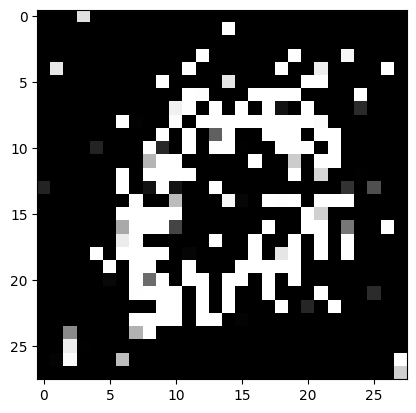

epoch 43 / 50, step 600 / 938, gen_loss = 2.2012, disc_loss = 0.2511
epoch 43 / 50, step 700 / 938, gen_loss = 2.0870, disc_loss = 0.3002
epoch 43 / 50, step 800 / 938, gen_loss = 2.3315, disc_loss = 0.2538
epoch 43 / 50, step 900 / 938, gen_loss = 2.3861, disc_loss = 0.3510
epoch 44 / 50, step 100 / 938, gen_loss = 1.9862, disc_loss = 0.2761
epoch 44 / 50, step 200 / 938, gen_loss = 2.1281, disc_loss = 0.2984
epoch 44 / 50, step 300 / 938, gen_loss = 2.3895, disc_loss = 0.2906
epoch 44 / 50, step 400 / 938, gen_loss = 2.0728, disc_loss = 0.2714
epoch 44 / 50, step 500 / 938, gen_loss = 2.4061, disc_loss = 0.2495
torch.Size([1, 784])
tensor([[0.1890]], device='cuda:0', grad_fn=<SigmoidBackward0>)


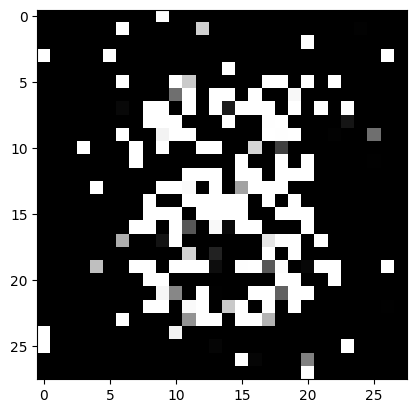

epoch 44 / 50, step 600 / 938, gen_loss = 1.9677, disc_loss = 0.3333
epoch 44 / 50, step 700 / 938, gen_loss = 2.2462, disc_loss = 0.3050
epoch 44 / 50, step 800 / 938, gen_loss = 2.1250, disc_loss = 0.3357
epoch 44 / 50, step 900 / 938, gen_loss = 2.0084, disc_loss = 0.2787
epoch 45 / 50, step 100 / 938, gen_loss = 2.0152, disc_loss = 0.3398
epoch 45 / 50, step 200 / 938, gen_loss = 2.2446, disc_loss = 0.3262
epoch 45 / 50, step 300 / 938, gen_loss = 1.8809, disc_loss = 0.3743
epoch 45 / 50, step 400 / 938, gen_loss = 2.2516, disc_loss = 0.3317
epoch 45 / 50, step 500 / 938, gen_loss = 2.1617, disc_loss = 0.3273
torch.Size([1, 784])
tensor([[0.0777]], device='cuda:0', grad_fn=<SigmoidBackward0>)


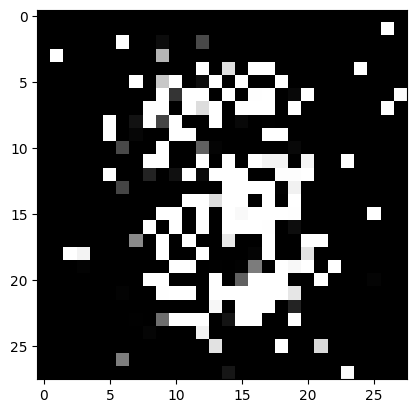

epoch 45 / 50, step 600 / 938, gen_loss = 1.8163, disc_loss = 0.3277
epoch 45 / 50, step 700 / 938, gen_loss = 2.1894, disc_loss = 0.2539
epoch 45 / 50, step 800 / 938, gen_loss = 2.0803, disc_loss = 0.3513
epoch 45 / 50, step 900 / 938, gen_loss = 1.8174, disc_loss = 0.3690
epoch 46 / 50, step 100 / 938, gen_loss = 2.1892, disc_loss = 0.3080
epoch 46 / 50, step 200 / 938, gen_loss = 2.0825, disc_loss = 0.3793
epoch 46 / 50, step 300 / 938, gen_loss = 2.3242, disc_loss = 0.3002
epoch 46 / 50, step 400 / 938, gen_loss = 1.9142, disc_loss = 0.3296
epoch 46 / 50, step 500 / 938, gen_loss = 2.0128, disc_loss = 0.3666
torch.Size([1, 784])
tensor([[0.3039]], device='cuda:0', grad_fn=<SigmoidBackward0>)


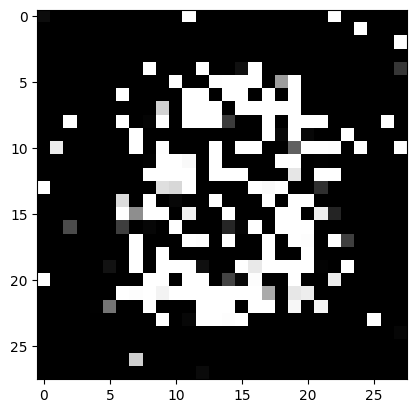

epoch 46 / 50, step 600 / 938, gen_loss = 2.5831, disc_loss = 0.3374
epoch 46 / 50, step 700 / 938, gen_loss = 1.8938, disc_loss = 0.4074
epoch 46 / 50, step 800 / 938, gen_loss = 2.1901, disc_loss = 0.4510
epoch 46 / 50, step 900 / 938, gen_loss = 2.0442, disc_loss = 0.2995
epoch 47 / 50, step 100 / 938, gen_loss = 2.3942, disc_loss = 0.2750
epoch 47 / 50, step 200 / 938, gen_loss = 1.9851, disc_loss = 0.3822
epoch 47 / 50, step 300 / 938, gen_loss = 2.0313, disc_loss = 0.3844
epoch 47 / 50, step 400 / 938, gen_loss = 2.1009, disc_loss = 0.3127
epoch 47 / 50, step 500 / 938, gen_loss = 1.7324, disc_loss = 0.4010
torch.Size([1, 784])
tensor([[0.2740]], device='cuda:0', grad_fn=<SigmoidBackward0>)


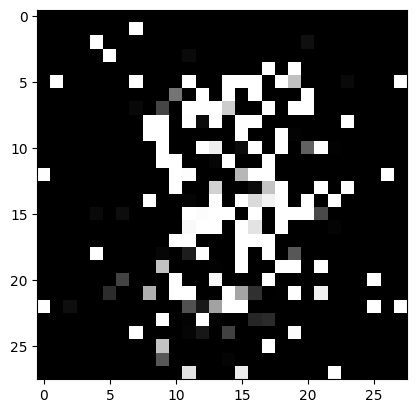

epoch 47 / 50, step 600 / 938, gen_loss = 1.8691, disc_loss = 0.3458
epoch 47 / 50, step 700 / 938, gen_loss = 2.3312, disc_loss = 0.4269
epoch 47 / 50, step 800 / 938, gen_loss = 2.1390, disc_loss = 0.3347
epoch 47 / 50, step 900 / 938, gen_loss = 1.9739, disc_loss = 0.3471
epoch 48 / 50, step 100 / 938, gen_loss = 2.2889, disc_loss = 0.3409
epoch 48 / 50, step 200 / 938, gen_loss = 2.1711, disc_loss = 0.3004
epoch 48 / 50, step 300 / 938, gen_loss = 2.3390, disc_loss = 0.3318
epoch 48 / 50, step 400 / 938, gen_loss = 1.9882, disc_loss = 0.3194
epoch 48 / 50, step 500 / 938, gen_loss = 2.0781, disc_loss = 0.3838
torch.Size([1, 784])
tensor([[0.4264]], device='cuda:0', grad_fn=<SigmoidBackward0>)


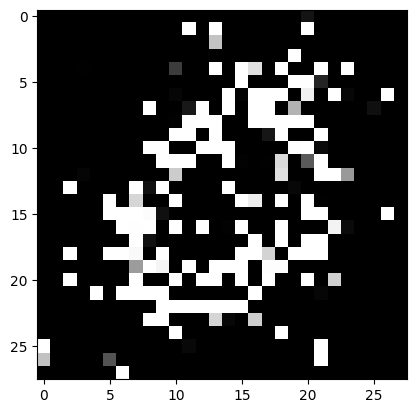

epoch 48 / 50, step 600 / 938, gen_loss = 1.7130, disc_loss = 0.3317
epoch 48 / 50, step 700 / 938, gen_loss = 1.6684, disc_loss = 0.4055
epoch 48 / 50, step 800 / 938, gen_loss = 2.3148, disc_loss = 0.3542
epoch 48 / 50, step 900 / 938, gen_loss = 1.9190, disc_loss = 0.3431
epoch 49 / 50, step 100 / 938, gen_loss = 2.1201, disc_loss = 0.3102
epoch 49 / 50, step 200 / 938, gen_loss = 2.6087, disc_loss = 0.3693
epoch 49 / 50, step 300 / 938, gen_loss = 2.8573, disc_loss = 0.2504
epoch 49 / 50, step 400 / 938, gen_loss = 2.0278, disc_loss = 0.3110
epoch 49 / 50, step 500 / 938, gen_loss = 2.2963, disc_loss = 0.3168
torch.Size([1, 784])
tensor([[0.2392]], device='cuda:0', grad_fn=<SigmoidBackward0>)


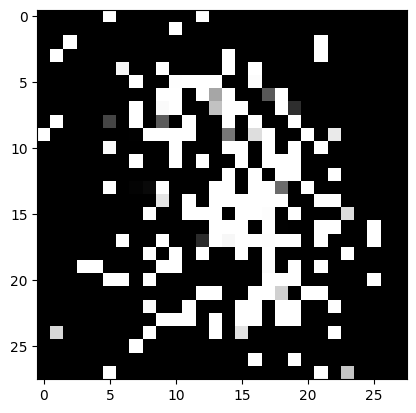

epoch 49 / 50, step 600 / 938, gen_loss = 1.9914, disc_loss = 0.3405
epoch 49 / 50, step 700 / 938, gen_loss = 2.3776, disc_loss = 0.3477
epoch 49 / 50, step 800 / 938, gen_loss = 1.9703, disc_loss = 0.3346
epoch 49 / 50, step 900 / 938, gen_loss = 2.1559, disc_loss = 0.2960
epoch 50 / 50, step 100 / 938, gen_loss = 2.2245, disc_loss = 0.2818
epoch 50 / 50, step 200 / 938, gen_loss = 2.1059, disc_loss = 0.4634
epoch 50 / 50, step 300 / 938, gen_loss = 2.2822, disc_loss = 0.2540
epoch 50 / 50, step 400 / 938, gen_loss = 2.3454, disc_loss = 0.3381
epoch 50 / 50, step 500 / 938, gen_loss = 1.8832, disc_loss = 0.2948
torch.Size([1, 784])
tensor([[0.0158]], device='cuda:0', grad_fn=<SigmoidBackward0>)


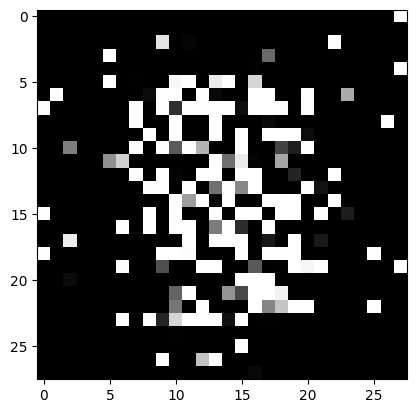

epoch 50 / 50, step 600 / 938, gen_loss = 2.0628, disc_loss = 0.3165
epoch 50 / 50, step 700 / 938, gen_loss = 2.3962, disc_loss = 0.3393
epoch 50 / 50, step 800 / 938, gen_loss = 2.4604, disc_loss = 0.3619
epoch 50 / 50, step 900 / 938, gen_loss = 1.8514, disc_loss = 0.3576


In [15]:
# Training the models
n_total_steps = len(mnist_train_loader)
for epoch in range(num_epochs):
    for i, (real, labels) in enumerate(mnist_train_loader):
        # Sample minibatch of batch_size noise samples
        z = torch.randn(batch_size, latent_dim).to(device)

        real.to(device)

        # Train the generator

        # forward pass
        generator_output = generator(z)
        discriminator_output = discriminator(generator_output)
        gen_loss = -(discriminator_output.log()).mean(0)
        # best loss = 0, pretty bad loss = 0.7
        #one_minus = torch.ones_like(discriminator_output) - discriminator_output
        #gen_loss = (one_minus.log()).mean(0)


        # backward pass
        genopt.zero_grad()
        gen_loss.backward()
        genopt.step()

        
        # Train the discriminator
        discriminator.train()   # enable dropout

        z = torch.randn(batch_size, latent_dim).to(device)

        # forward pass
        first_probs = discriminator(real.view(real.shape[0], -1).to(device))
        #print("first_probs shape: ", first_probs.shape)
        generator_output = generator(z)
        discriminator_output = discriminator(generator_output)
        second_probs = torch.ones_like(discriminator_output) - discriminator_output
        #print("second_probs shape: ", second_probs.shape)

        # Calculate the loss

        # 1) first part
        first_loss = -(first_probs.log()).mean(0)
        #print(first_loss.item())

        second_loss = -(second_probs.log()).mean(0)
        #print(second_loss.item())

        final_disc_loss = (first_loss + second_loss) / 2

        # backward pass
        discopt.zero_grad()
        final_disc_loss.backward()
        discopt.step()

        if (i + 1) % 100 == 0:
            print(f'epoch {epoch + 1} / {num_epochs}, step {i + 1} / {n_total_steps}, gen_loss = {gen_loss.item():.4f}, disc_loss = {final_disc_loss.item():.4f}')

        if (i + 1) % 500 == 0:
            # Sample an image from the generator
            discriminator.eval()    # Disable dropout

            z1 = (torch.randn(1, latent_dim) * 10).to(device)

            image = generator(z1)[0].cpu().view(1, -1)
            print(image.shape)

            discriminator_output = discriminator(image.to(device))
            print(discriminator_output)

            # Show the image (MNIST)
            pixels = image.detach().reshape((28, 28))
            plt.imshow(pixels, cmap="gray")
            plt.show()
            

torch.Size([1, 784])
tensor([[0.0171]], device='cuda:0', grad_fn=<SigmoidBackward0>)


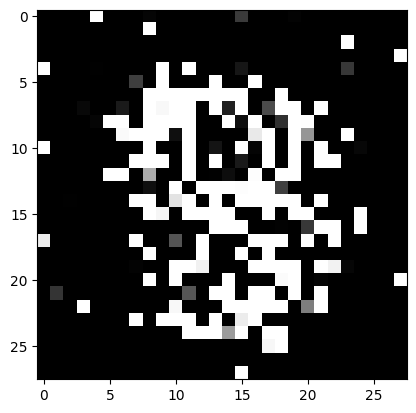

In [30]:
# Sample an image from the generator (MNIST)
z1 = (torch.randn(1, latent_dim) * 10).to(device)


image = generator(z1)[0].cpu().view(1, -1)
print(image.shape)

discriminator_output = discriminator(image.to(device))
print(discriminator_output)


# Show the image
pixels = image.detach().reshape((28, 28))
plt.imshow(pixels, cmap="gray")
plt.show()